Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


 Load Dataset

In [44]:
df = pd.read_csv('/content/Housing.csv')

Display first 5 rows

In [45]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


Check Columns & Missing Values

In [29]:
print("\nColumns in dataset:")
print(df.columns)


Columns in dataset:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


Data Preprocessing

In [30]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


 Fill missing numeric values with column mean

In [31]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Preprocessing


In [47]:
binary_cols = df.select_dtypes(include='object').columns
for col in binary_cols:
    if set(df[col].unique()) == {'yes', 'no'}:
        df[col] = df[col].map({'yes': 1, 'no': 0})

One-hot encode categorical columns

In [48]:
df = pd.get_dummies(df, drop_first=True)

Split into Features and Target

In [49]:
X = df.drop("price", axis=1)
y = df["price"]

Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions

In [52]:
y_pred = model.predict(X_test)

Evaluation Metrics

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
MAE: 970043.40
MSE: 1754318687330.66
RMSE: 1324506.96
R² Score: 0.65


Model Coefficients

In [54]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)


Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


Visualization - Actual vs Predicted

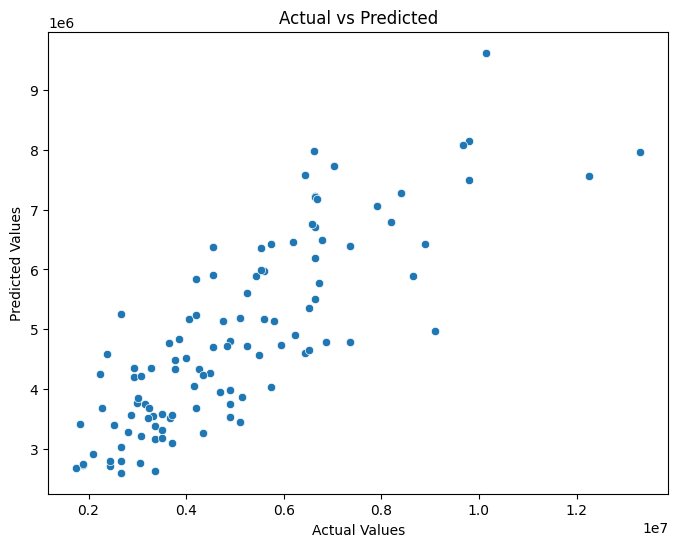

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

Plot Regression Line (for simple regression example)

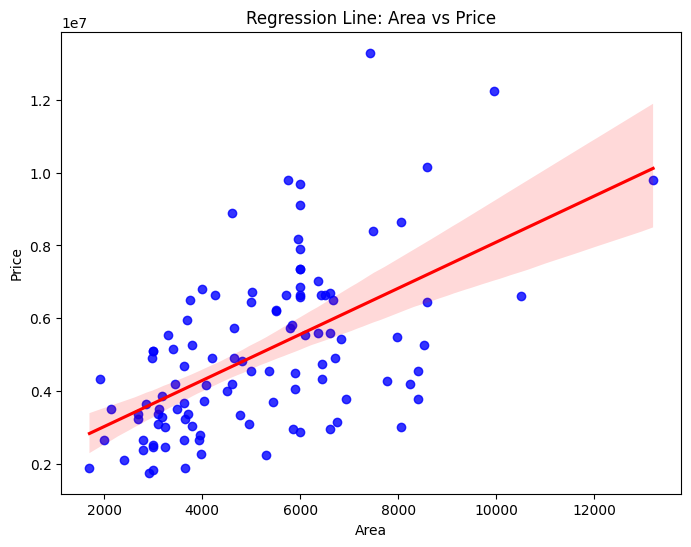

In [56]:
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['area'], y=y_test, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression Line: Area vs Price")
plt.show()
